# Dataset - Breast Cancer Wisconsin (Diagnostic)


In [ ]:
#import the libraries 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import RandomizedSearchCV



#1.View the dataset 


In [ ]:
#load the breast cancer dataset 

breast_cancer=load_breast_cancer()

#View the dataset 
attributes = np.array(breast_cancer.feature_names)
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target)
df_breast_cancer = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
df_breast_cancer['target'] = pd.Series(breast_cancer.target)
df_breast_cancer.head(569)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
# Distribution of class 
sns.set(style='darkgrid')
ax = sns.countplot(x="target", data=breast_cancer,order = df_breast_cancer['target'].value_counts().index)
plt.show()
n=df_breast_cancer['target'].value_counts()
print(n)

In [ ]:
#Check for missing values 
print(df_breast_cancer.isnull().sum())

# 2.Data Visualization 

a. Histogram Plot 

b. Correlation  matrix 

c. Box Plot
 

In [ ]:
#Histogram

fig = plt.figure(figsize = (2,2))  
sns.histplot(data=df_breast_cancer, x="mean radius" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean texture" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean perimeter" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean area" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean smoothness" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean compactness" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean concavity" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean concave points" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean symmetry" ,hue="target")
sns.histplot(data=df_breast_cancer, x="mean fractal dimension" ,hue="target")

#----------------------------------------------------------------------

sns.histplot(data=df_breast_cancer, x=" radius error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="texture error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="perimeter error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="area error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="smoothness error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="compactness error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="concavity error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="concave points error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="symmetry error" ,hue="target")
sns.histplot(data=df_breast_cancer, x="fractal dimension error" ,hue="target")

#--------------------------------------------------------------------------

sns.histplot(data=df_breast_cancer, x="worst radius" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst texture" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst perimeter" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst area" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst smoothness" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst compactness" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst concavity" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst concave points" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst symmetry" ,hue="target")
sns.histplot(data=df_breast_cancer, x="worst fractal dimension" ,hue="target")


In [ ]:
# Compute the correlation matrix
sns.set_theme(style="white")

corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#Box Plot mean group diagonis of tumor for M and B 

fig = plt.figure(figsize = (2,2))
plot = sns.boxplot(x='target', y='mean texture', data=df_breast_cancer, showfliers=False)
plt.title('Mean texture vs Diagonis of tumor')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'mean radius', data =df_breast_cancer )
plt.title(' Mean radius vs Diagonis of tumor ')


fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'mean perimeter', data =df_breast_cancer )
plt.title(' Mean perimeter vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'mean compactness', data =df_breast_cancer )
plt.title(' Mean compactness vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'mean concavity', data =df_breast_cancer )
plt.title(' Mean concavity vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'mean concave points', data =df_breast_cancer )
plt.title(' Mean concave points vs Diagonis of tumor ')



In [ ]:
#Box Plot error group diagonis of tumor for M and B

fig = plt.figure(figsize = (2,2))
plot = sns.boxplot(x='target', y='texture error', data=df_breast_cancer, showfliers=False)
plt.title('Error texture vs Diagonis of tumor')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'radius error', data =df_breast_cancer )
plt.title('Error radius vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'perimeter error', data =df_breast_cancer )
plt.title('Error perimeter vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'compactness error', data =df_breast_cancer )
plt.title('Error compactness vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'concavity error', data =df_breast_cancer )
plt.title(' Error concavity vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'concave points error', data =df_breast_cancer )
plt.title(' Error concave vs Diagonis of tumor ')

In [ ]:
#Box Plot worst group diagonis of tumor for M and B

fig = plt.figure(figsize = (2,2))
plot = sns.boxplot(x='target', y='worst texture', data=df_breast_cancer, showfliers=False)
plt.title('Worst texture vs Diagonis of tumor')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'worst radius', data =df_breast_cancer )
plt.title('Worst radius vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'worst perimeter', data =df_breast_cancer )
plt.title('Worst perimeter error vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'worst compactness', data =df_breast_cancer )
plt.title('Worst compactness error vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'worst concavity', data =df_breast_cancer )
plt.title(' Worst concavity vs Diagonis of tumor ')

fig = plt.figure(figsize = (2,2))
sns.boxplot(x = 'target', y = 'worst concave points', data =df_breast_cancer )
plt.title(' Worst concave vs Diagonis of tumor ')

#3.Principal Component Analysis 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

standardized = StandardScaler()
standardized.fit(df_breast_cancer)
scaled_data = standardized.transform(df_breast_cancer)

pca = PCA(n_components=2)
dfx_pca=pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

print("Variance explained by all the 2 components =" , sum(pca.explained_variance_ratio_ * 100))


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)


In [ ]:
#Print the variances 
print("Variance explained by the First principal component=", np.cumsum(pca.explained_variance_ratio_*100)[0])
print("Variance explained by the Second principal component=", np.cumsum(pca.explained_variance_ratio_*100)[1])
print("Variance explained by the Third principal component=", np.cumsum(pca.explained_variance_ratio_*100)[2])
print("Variance explained by the First 10 principal component=", np.cumsum(pca.explained_variance_ratio_*100)[9])

In [ ]:
# PCA =2 Components 
pca= PCA(n_components=2)
dfx_pca=pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(8,4))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1],s=70, hue=breast_cancer.target, palette=['orange','red'])
plt.title("2D Scatterplot: 63.36% of the variability captured", pad=15)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.savefig("2d_scatterplot.png")



In [ ]:
# PCA = 3 Components 

from mpl_toolkits import mplot3d

pca= PCA(n_components=3)
dfx_pca=pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

plt.figure(figsize=(10,8))
ax=plt.axes(projection='3d')

sctt=ax.scatter3D(x_pca[:,0], x_pca[:,1], x_pca[:,2],c=breast_cancer.target,s=50,alpha=0.6)

plt.title("3D Scatterplot: 72.55% of the variability captured", pad=15)
ax.set_xlabel("First principal component")
ax.set_ylabel("Second principal component")
ax.set_zlabel("Third principal component")

plt.savefig("2d_scatterplot.png")

In [ ]:
#Explained Variance Ratio
standardized = StandardScaler()
standardized.fit(df_breast_cancer)
scaled_data = standardized.transform(df_breast_cancer)

pca = PCA(n_components=10)
dfx_pca=pca.fit(scaled_data)
plt.figure(figsize=(7,5))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

#4.Prepare the data


In [ ]:
# randomly splitting the data (5:2:3) in train , val, test 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 5/7, shuffle = True, random_state = 42)
print (' Training and validation:' +repr(len(X_train_val)))
print (' Training:' +repr(len(X_train)))
print (' Validation:' +repr(len(X_val)))
print (' Test:' +repr(len(X_test)))

 Training and validation:398
 Training:284
 Validation:114
 Test:171


In [ ]:
# MinMax Scaling  
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train_val=scaler.fit_transform(X_train_val)
X_test = scaler.fit_transform(X_test)

#5.K-Nearest-Neighbors 

K-NN classification using different values of K.

In [ ]:
#Create the model 
k_values = [1,3,5,7,9]
acc_scores = []

# trying with different values of K 
for K in k_values:
    model1 = KNeighborsClassifier(n_neighbors = K , p=2)
    model1.fit(X_train, y_train)
  
    y_pred = model1.predict(X_train_val)
    

# Calculating the accuracies
print("Training accuracy :", model1.score(X_train, y_train) *100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)

In [ ]:
#cross validation to select the best value of K 
neighbors = [] 
cv_scores = [] 
  
from sklearn.model_selection import cross_val_score 
# perform 5 fold cross validation 
for k in range(1, 11, 2): 
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k, p=2) 
    scores = cross_val_score( knn, X_train_val, y_train_val, cv = 5, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 
    
MSE = [1-x for x in cv_scores] 
  
# determining the best k 
optimal_k = neighbors[MSE.index(min(MSE))] 
print('The optimal number of neighbors is % d ' % optimal_k) 
  
# plot misclassification error versus k 
plt.figure(figsize = (6, 4)) 
plt.plot(neighbors, MSE) 
plt.xlabel('Number of neighbors') 
plt.ylabel('Misclassification Error') 
plt.show()

In [ ]:
#create a new KNN model with best parameters
model_best1 = KNeighborsClassifier(n_neighbors=3, p=2)
model_best1.fit(X_train_val, y_train_val)
  
y_pred = model_best1.predict(X_test)

print("Test accuarcy :", accuracy_score(y_test,y_pred)* 100)

#Classification report
cm = classification_report(y_test, y_pred)
print(cm)

#Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(model_best1, X_test, y_test)
plt.show()  


#6.Linear and RBF SVM 

In [ ]:
# Create the model
model2 =SVC(C=10, kernel='linear')

# feeding the training data into the model
model2.fit(X_train, y_train)

# predicting the validation set results
y_pred = model2.predict(X_train_val)

# Calculating the accuracies
print("Training accuracy :", model2.score(X_train, y_train)*100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)
print("Testing accuarcy :", accuracy_score(y_test,y_pred)*100)



In [ ]:
# Create the model
model2 =SVC(C=10, kernel='rbf',gamma=0.1)

# feeding the training data into the model
model2.fit(X_train, y_train)

# predicting the validation set results
y_pred = model2.predict(X_train_val)

# Calculating the accuracies
print("Training accuracy :", model2.score(X_train, y_train)*100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)


In [ ]:
# using grid search to find the best parameters for svm

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4,10],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model2, param_grid = param, scoring = 'accuracy', cv = 10)

In [ ]:
grid_svc.fit(X_train_val, y_train_val)

In [ ]:
grid_svc.best_params_

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
# creating a new SVC model with these best parameters
model_best2 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
model_best2.fit(X_train_val, y_train_val)
y_pred = model_best2.predict(X_test)

#Test Accuracy 
print("Testing accuarcy :", accuracy_score(y_test,y_pred)*100)

#Classification Report 
print(classification_report(y_test, y_pred))

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(model_best2, X_test, y_test)
plt.show()


#7.Logistic Regression 


In [ ]:
# creating the model
model3 = LogisticRegression(random_state = 0)

# feeding the training data into the model
model3.fit(X_train, y_train)

# predicting the validation set results
y_pred = model3.predict(X_train_val)

# Calculating the accuracies
print("Training accuracy :", model3.score(X_train, y_train)*100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)

In [ ]:
# using grid search to find the best parameters for LR

param = {
    'C': [0.001, 0.1, 1, 10, 100]
}
grid_LR = GridSearchCV(model3, param_grid = param, scoring = 'accuracy', cv = 10)

grid_LR.fit(X_train_val, y_train_val)

In [ ]:
grid_LR.best_params_

{'C': 10}

In [ ]:
# creating a new LR model with these best parameter C
best_model3= LogisticRegression(C=10)
best_model3.fit(X_train_val, y_train_val)
y_pred = best_model3.predict(X_test)
print("Testing accuarcy :", accuracy_score(y_test,y_pred)*100)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(best_model3, X_test, y_test)
plt.show()

#8.Decision Tree

In [ ]:
# Creating a model
model4 = DecisionTreeClassifier()

# feeding the training set into the model
model4.fit(X_train, y_train)

# predicting the validation set results
y_pred = model4.predict(X_train_val)

# Calculating the accuracies
print("Training accuracy :", model4.score(X_train, y_train)*100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)


In [ ]:
# using grid search to find the best parameters for Decision Tree

param = {
    'criterion':['entropy', 'gini'],
    'max_depth':[10, 50, 100]
}
grid_DT = GridSearchCV(model4, param_grid = param, scoring = 'accuracy', cv = 10)

grid_DT.fit(X_train_val, y_train_val)

In [ ]:
grid_DT.best_params_

{'criterion': 'entropy', 'max_depth': 100}

In [ ]:
#creating a new Decison Tree model with these best parameters

best_model4= DecisionTreeClassifier(criterion ='entropy', max_depth =100 ,random_state=0)
best_model4.fit(X_train_val, y_train_val)
y_pred = best_model4.predict(X_test)
print("Testing accuarcy :", accuracy_score(y_test,y_pred)*100)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(best_model4, X_test, y_test)
plt.show()



In [ ]:
#Visualizing the decison Tree
import graphviz
fig = plt.figure(figsize=(25,15)) 
tree.plot_tree(best_model4, feature_names=breast_cancer.feature_names,class_names=breast_cancer.target_names,filled=True)


#9.Random Forest 

In [ ]:
# creating a model
model5 = RandomForestClassifier()

# feeding the training set into the model
model5.fit(X_train, y_train)

# predicting the validation set results
y_pred = model5.predict(X_train_val)

# Calculating the accuracies
print("Training accuracy :", model5.score(X_train, y_train)*100)
print("Validation accuarcy :", accuracy_score(y_train_val,y_pred)*100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Training accuracy : 100.0
Validation accuarcy : 97.23618090452261


In [ ]:
param = {"n_estimators": np.arange(10,100,5),
              "min_samples_split": np.arange(2,100,2),
              "criterion": ["gini", "entropy"],
              "max_depth" :np.arange(10,100,10),
              "max_features":['auto', 'sqrt'],
              "bootstrap":[True,False]
              }
grid_RF = RandomizedSearchCV(model5, param_distributions = param, scoring = 'accuracy', cv = 10)
grid_RF.fit(X_train_val, y_train_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
grid_RF.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 65}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Testing accuarcy : 94.73684210526315
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        64
           1       0.92      1.00      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



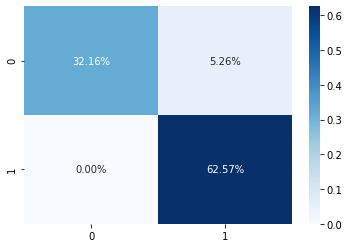

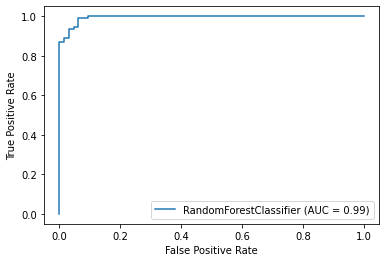

In [ ]:
best_model5= RandomForestClassifier(bootstrap='True',criterion ='entropy', max_depth=30,max_features='auto',min_samples_split =8,n_estimators= 65,random_state=20)
best_model5.fit(X_train_val, y_train_val)
y_pred = best_model5.predict(X_test)
print("Testing accuarcy :",accuracy_score(y_test,y_pred)*100)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

#Plot of ROC Curve 
metrics.plot_roc_curve(best_model5, X_test, y_test)
plt.show()
